In [1]:
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

In [53]:
# Load cumilative datasets created in step 1
cumllaborcnty = pd.read_csv('cumllaborcnty.csv')
cumllaborvt = pd.read_csv('cumllaborvt.csv')

In [54]:
cumllaborcnty.head()

,Year,County,Type,Jan,Feb,Mar,Apr,May,Jun,Jul,...,Average Wage Qtr 1,Average Wage Qtr 2,Average Wage Qtr 3,Average Wage Qtr 4,Average Wage Annual,Number of Establishments Qtr 1,Number of Establishments Qtr 2,Number of Establishments Qtr 3,Number of EstablishmentsQtr 4,Number of Establishments Annual
0,2000,Addison County,Total Covered - all ownerships,13094,13104,13287,13656,14168,14481,13551,...,6741,6494,6862,6920,27013,1217,1249,1256,1252,1244
1,2000,Addison County,Private ownership,11078,11077,11209,11545,12003,12300,12115,...,6850,6464,6916,7057,27284,1103,1135,1142,1138,1130
2,2000,Addison County,Goods Producing domain,3259,3261,3290,3366,3467,3585,3581,...,8356,7816,8001,8543,32702,274,282,283,288,282
3,2000,Addison County,Natural Resources and Mining supersector,459,472,491,533,561,599,576,...,5045,5015,5085,5220,20366,69,69,69,70,69
4,2000,Addison County,"Agriculture, forestry, fishing and hunting",421,437,453,484,510,538,518,...,4957,4866,4875,5020,19710,61,61,61,62,61


In [55]:
cumllaborcnty = pd.melt(cumllaborcnty,id_vars=['Year','County','Type'],var_name='Time', value_name='Count')

In [59]:
cumllaborcnty.head()

,Year,County,Type,Time,Count
0,2000,Addison County,Total Covered - all ownerships,Jan,13094
1,2000,Addison County,Private ownership,Jan,11078
2,2000,Addison County,Goods Producing domain,Jan,3259
3,2000,Addison County,Natural Resources and Mining supersector,Jan,459
4,2000,Addison County,"Agriculture, forestry, fishing and hunting",Jan,421


In [61]:
# There are missing values or occasions where the occurance is too small to show, each we are replacing with NaNs
cumllaborcnty = cumllaborcnty.replace('(c)', np.nan)
cumllaborcnty = cumllaborcnty.replace('-', np.nan)
cumllaborcnty = cumllaborcnty.replace('na', np.nan)
cumllaborcnty = cumllaborcnty.replace('<1', np.nan)
cumllaborcnty['Count'] = pd.to_numeric(cumllaborcnty['Count'])

In [62]:
monthlist = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

quarterslist = ['Average Employment Qtr 1', 'Average Employment Qtr 2', 'Average Employment Qtr 3', 'Average Employment Qtr 4', 
            'Average Female Employment Qtr 1', 'Average Female Employment Qtr 2','Average Female Employment Qtr 3',
            'Average Female Employment Qtr 4','Total Wages Qtr 1', 'Total Wages 2', 'Total Wages 3', 
            'Total Wages 4','Average Wage Qtr 1', 'Average Wage Qtr 2', 'Average Wage Qtr 3', 
            'Average Wage Qtr 4','Number of Establishments Qtr 1', 'Number of Establishments Qtr 2',
            'Number of Establishments Qtr 3', 'Number of EstablishmentsQtr 4'
           ]

annuallist = ['Average Employment Annual', 'Average Female Employment Annual', 'Total Wages Annual',  'Average Wage Annual',
           'Number of Establishments Annual'
          ]

In [63]:
months = cumllaborcnty[cumllaborcnty['Time'].isin(monthlist)]
quarters = cumllaborcnty[cumllaborcnty['Time'].isin(quarterslist)]
annual = cumllaborcnty[cumllaborcnty['Time'].isin(annuallist)]

In [66]:
# Clean up the column order and then sort everythin
months.sort_values(by=['County','Year','Time'])
months.shape

(101172, 5)

## Exploring the Data

At this point what we have is month over month employment counts for 17 years by industry at various levels. First we are going to tackle the supersectors and see what they look like in box plots. Box plots are a standardized way of displaying the distribution of data based on the five number summary: 
* minimum (bottom T of the line)
* first quartile (bottom of the box)
* median (horizontal line bisecting the box)
* third quartile (top of the box)
* maximum. (top T of the line

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

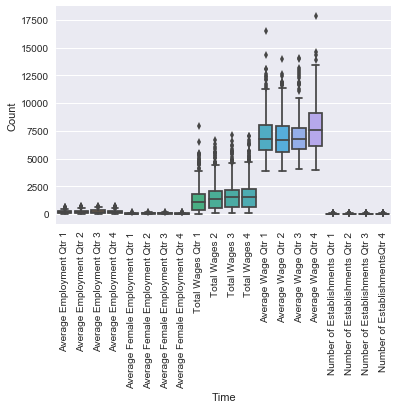

In [68]:
natres = quarters[quarters['Type'] == 'Natural Resources and Mining supersector']

data = natres
sns.boxplot(x='Time', y='Count',  data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

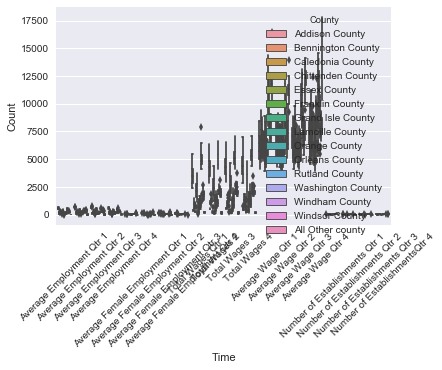

In [71]:
data = natres
sns.boxplot(x='Time', y='Count', hue='County',  data=data)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

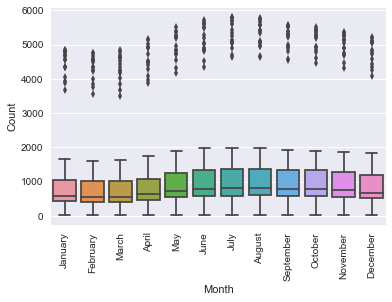

In [8]:
const = months[months['Type'] == 'Construction supersector']

data = const
sns.boxplot(x='Month', y='Count',  data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

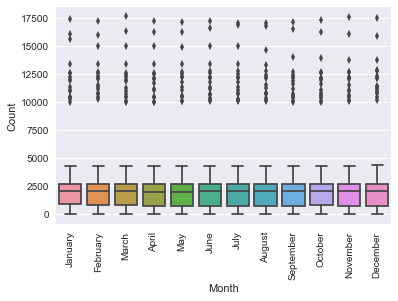

In [9]:
manf = months[months['Type'] == 'Manufacturing supersector']

data = manf
sns.boxplot(x='Month', y='Count',  data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

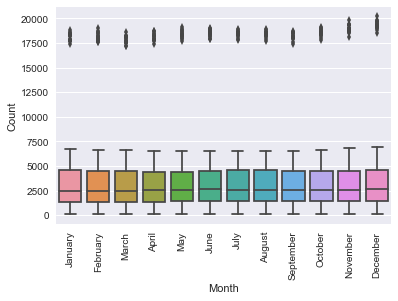

In [10]:
trade = months[months['Type'] == 'Trade, Transportation, and Utilities supersector']

data = trade
sns.boxplot(x='Month', y='Count',  data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

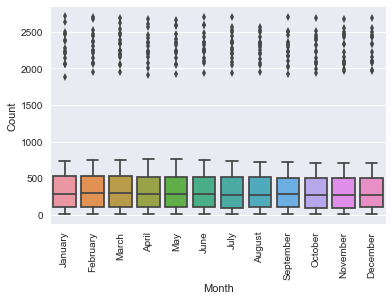

In [11]:
info = months[months['Type'] == 'Information supersector']
data = info
sns.boxplot(x='Month', y='Count', data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

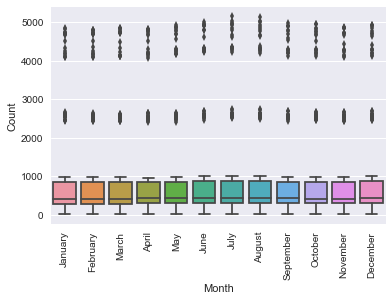

In [12]:
fin = months[months['Type'] == 'Financial Activities supersector']
data = fin
sns.boxplot(x='Month', y='Count',  data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

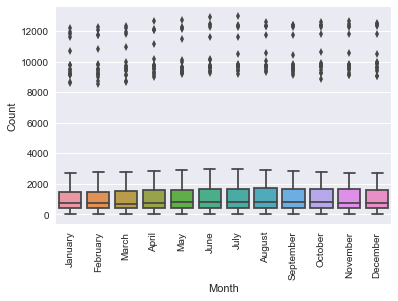

In [13]:
busin = months[months['Type'] == 'Professional and Business Services supersector']
data = busin
sns.boxplot(x='Month', y='Count', data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

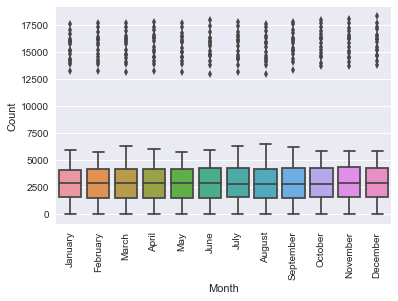

In [14]:
edhealth = months[months['Type'] == 'Education and Health Services supersector']
data = edhealth
sns.boxplot(x='Month', y='Count', data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

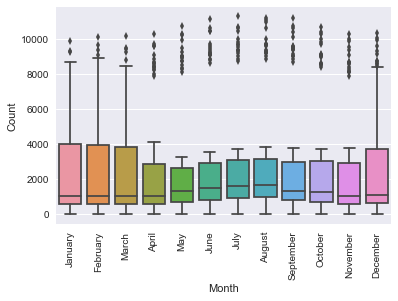

In [15]:
leis = months[months['Type'] == 'Leisure and Hospitality supersector']
data = leis
sns.boxplot(x='Month', y='Count', data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

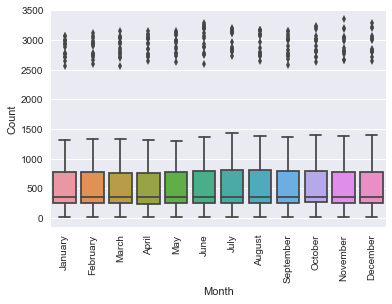

In [16]:
other = months[months['Type'] == 'Other services, except public administration supersector']
data = other
sns.boxplot(x='Month', y='Count', data=data)
plt.xticks(rotation=90)

In [17]:
art = months[months['Type'] == 'Arts, entertainment, and recreation']
#art = months[months['Type'] == 'Leisure and Hospitality supersector']

art.head()

,Year,Month,County,Type,Count
28,2000,January,Addison County,"Arts, entertainment, and recreation",87.0
63,2000,January,Bennington County,"Arts, entertainment, and recreation",461.0
98,2000,January,Caledonia County,"Arts, entertainment, and recreation",60.0
134,2000,January,Chittenden County,"Arts, entertainment, and recreation",1262.0
169,2000,January,Essex County,"Arts, entertainment, and recreation",10.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

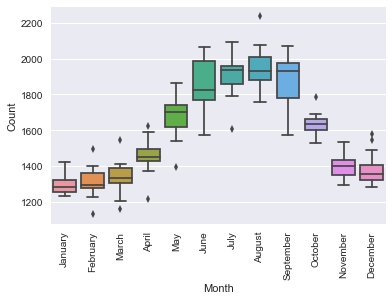

In [18]:
data = art[art['County'] == 'Chittenden County']
sns.boxplot(x='Month', y='Count',   data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

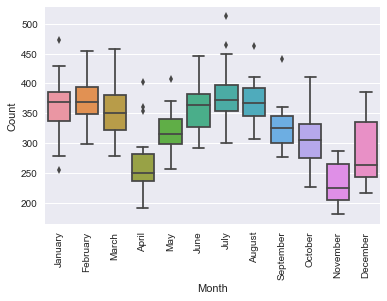

In [19]:
data = art[art['County'] == 'Washington County']
sns.boxplot(x='Month', y='Count',   data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

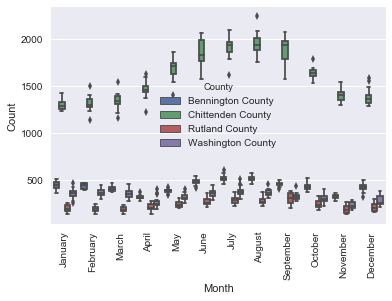

In [20]:
data = art
data = data[(data['County'] == 'Bennington County') |
          (data['County'] == 'Washington County') | 
          (data['County'] == 'Chittenden County') | 
          (data['County'] == 'Rutland County')]
sns.boxplot(x='Month', y='Count', hue='County',  data=data)
plt.xticks(rotation=90)

In [21]:
health = months[months['Type'] == 'Education and Health Services supersector']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

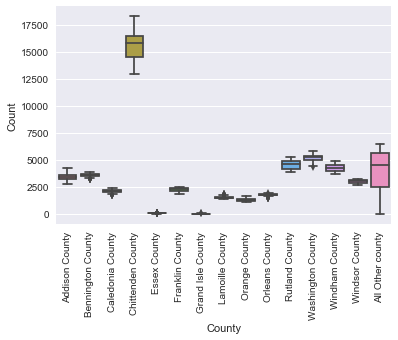

In [22]:
sns.boxplot(x='County', y='Count', data=health)
plt.xticks(rotation=90)

In [23]:
pd.unique(months['Type'])

array(['Total Covered -  all ownerships', 'Private ownership',
       'Goods Producing domain',
       'Natural Resources and Mining supersector',
       'Agriculture, forestry, fishing and hunting', 'Mining',
       'Construction supersector', 'Manufacturing supersector',
       'Durable Goods manufacturing', 'Non-Durable Goods manufacturing',
       'Service Providing domain',
       'Trade, Transportation, and Utilities supersector',
       'Wholesale trade', 'Retail trade', 'Transportation and warehousing',
       'Utilities', 'Information supersector',
       'Financial Activities supersector', 'Finance and insurance',
       'Real estate and rental and leasing',
       'Professional and Business Services supersector',
       'Professional and technical services',
       'Management of companies and enterprises',
       'Administrative and waste services',
       'Education and Health Services supersector', 'Educational services',
       'Health care and social assistance',
      

In [24]:
fin = months[months['Type'] == 'Financial Activities supersector']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

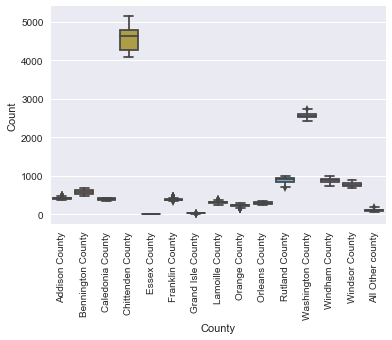

In [25]:
sns.boxplot(x='County', y='Count',  data=fin)
plt.xticks(rotation=90)

In [26]:
tech = months[months['Type'] == 'Professional and Business Services supersector']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

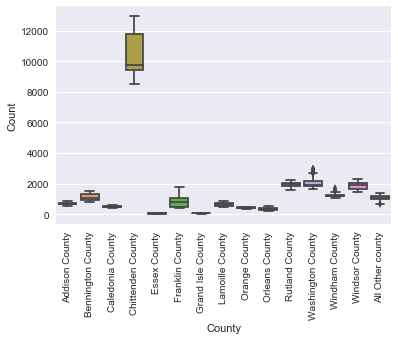

In [27]:
sns.boxplot(x='County', y='Count',  data=tech)
plt.xticks(rotation=90)

In [28]:
info = months[months['Type'] == 'Information supersector']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

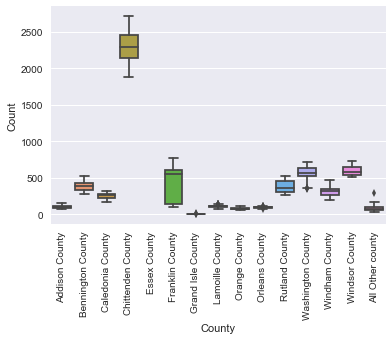

In [29]:
sns.boxplot(x='County', y='Count',  data=info)
plt.xticks(rotation=90)

In [30]:
healthed = months[months['Type'] == 'Education and Health Services supersector']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

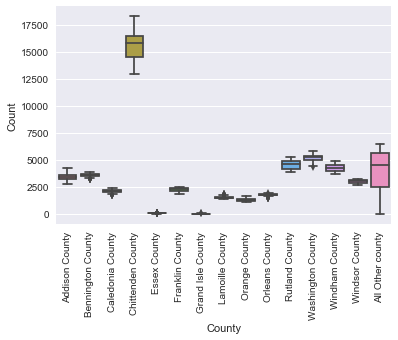

In [31]:
sns.boxplot(x='County', y='Count',  data=healthed)
plt.xticks(rotation=90)

In [32]:
fed = months[months['Type'] == 'Federal Government']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

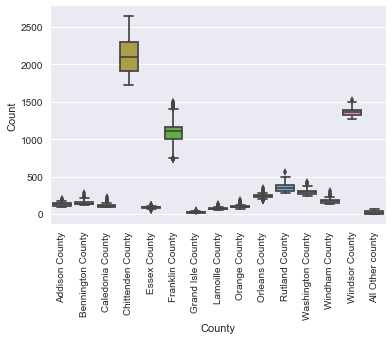

In [33]:
sns.boxplot(x='County', y='Count',  data=fed)
plt.xticks(rotation=90)

In [34]:
state = months[months['Type'] == 'State government']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

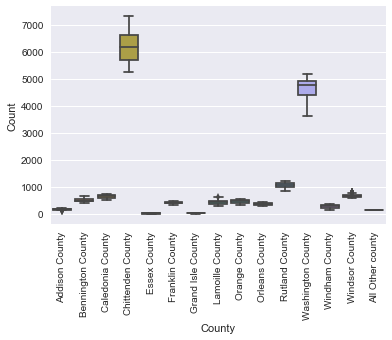

In [35]:
sns.boxplot(x='County', y='Count',  data=state)
plt.xticks(rotation=90)